In [659]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [660]:
# Loading shapefile and creating a Geo-Dataframe (gdf)
shapefile_path = './gis-map/districts.shp'
csv_path = './data/college_csit.csv'
gdf = gpd.read_file(shapefile_path)
df = pd.read_csv(csv_path)

In [661]:
# Visualize the data of the map without the geometry data (takes a lot of space)
gdf_without_geometry = gdf.drop("geometry", axis=1).copy()
gdf_without_geometry.style.set_table_styles([{'selector': 'caption', 'props': [('text-align', 'left')]}])

,fid,DISTRICT,FIRST_STAT,FIRST_DIST
0,1,ACHHAM,7.000000,ACHHAM
1,2,ARGHAKHANCHI,5.000000,ARGHAKHANCHI
2,3,BAGLUNG,4.000000,BAGLUNG
3,4,BAITADI,7.000000,BAITADI
4,5,BAJHANG,7.000000,BAJHANG
5,6,BAJURA,7.000000,BAJURA
6,7,BANKE,5.000000,BANKE
7,8,BARA,2.000000,BARA
8,9,BARDIYA,5.000000,BARDIYA
9,10,BHAKTAPUR,3.000000,BHAKTAPUR


In [662]:
# Defining function for data visualization
def color_district(geodataframe, 
                   districts_arr,
                   color:str = "royalblue", 
                   title:str = "Districts of Nepal",
                   axis:bool = True):
    districts_arr = ["NAWALPARASI_E" if district.upper().startswith("NAWAL") else district.upper() for district in districts_arr]
    geodataframe["color"] = geodataframe["DISTRICT"].apply(
        lambda x: color if x in districts_arr else "lightgray" 
    )
    fig, ax = plt.subplots(figsize=(10, 10))
    geodataframe.plot(ax=ax, color=gdf["color"], edgecolor="whitesmoke")
    ax.set_title(title)
    if axis != True:
        ax.set_axis_off()
    plt.show()

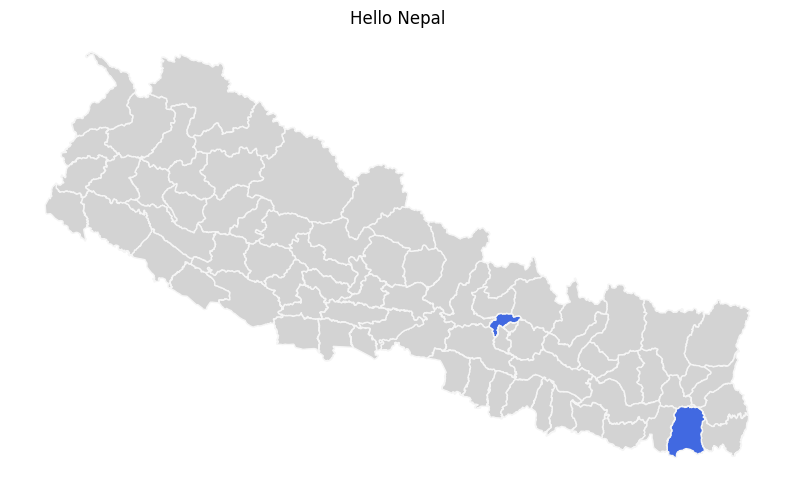

In [663]:
# Example I: Coloring Districts
districts = ["Kathmandu", "Morang"]
color_district(gdf, districts, title="Hello Nepal", axis=False)


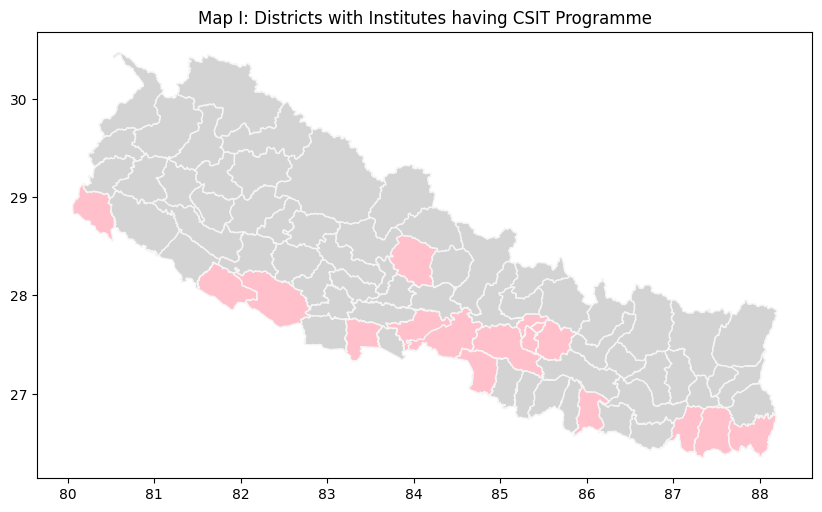

In [664]:
# Coloring I: Display Districts with CSIT Programme
districts_with_csit = (df["District"].unique()).tolist()
color_district(gdf,
               districts_arr=districts_with_csit,
               color="pink",
               title="Map I: Districts with Institutes having CSIT Programme",
               axis=True)
# Chitwan -> Chitawan, Makwanpur-> Makawanpur, Kavrepalanchok->Kabhrepalanchok, Nawalparasi->NAWALPARASI_E

In [665]:
def color_district_gradient(geodataframe, 
                            data_column, 
                            colormap='viridis', 
                            title="Districts of Nepal", 
                            axis=True,
                            linewidth=0.5):

    # Check if the data_column exists in the geodataframe
    geodataframe['color'] = geodataframe[data_column]
    fig, ax = plt.subplots(figsize=(10, 10))
    geodataframe.plot(
        ax=ax, 
        column='color', 
        cmap=colormap, 
        edgecolor="whitesmoke",
        linewidth=linewidth, 
        legend=True,
        vmin=0,
        vmax=9)

    ax.set_title(title)    
    if not axis:
        ax.set_axis_off()

    plt.show()



In [666]:
# Getting the number of institutions according to the district
df_district_csit = df["District"].value_counts().reset_index()
df_district_csit["District"] = df_district_csit["District"].replace("Nawalpur", "NAWALPARASI_E")
df_district_csit.columns = df_district_csit.columns.str.upper()
df_district_csit["DISTRICT"] = df_district_csit["DISTRICT"].str.upper()
print(df_district_csit)

           DISTRICT  COUNT
0         KATHMANDU     19
1          LALITPUR      6
2            MORANG      6
3         BHAKTAPUR      4
4         RUPANDEHI      4
5           SUNSARI      3
6             KASKI      3
7             BANKE      3
8             JHAPA      2
9          CHITAWAN      2
10             DANG      2
11  KABHREPALANCHOK      1
12       KANCHANPUR      1
13         DHANUSHA      1
14            PARSA      1
15       MAKAWANPUR      1
16    NAWALPARASI_E      1


In [667]:
# Merge the modified dataframe to GeoDataFrane
# All NULL values are filled with zero for easy map coloring

gdf = gdf.merge(df_district_csit, on="DISTRICT", how="left").fillna(0)

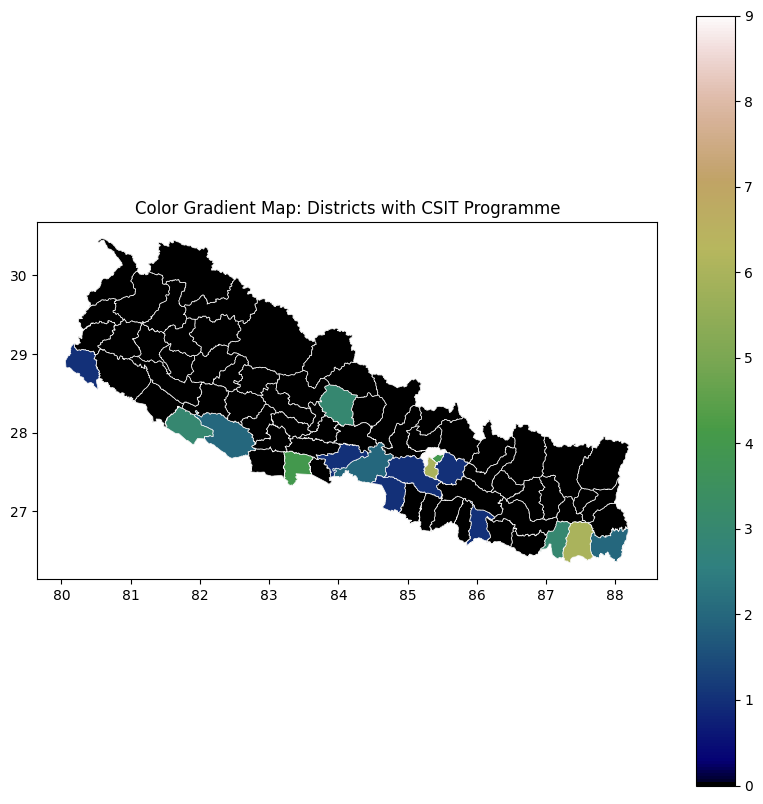

In [669]:
color_district_gradient(gdf,
                        title="Color Gradient Map: Districts with CSIT Programme", 
                        data_column="COUNT",
                        colormap="tab10")